### 네이버뉴스 크롤링 엑셀 파일 불러오기.

수집한 뉴스 데이터를 불러옴

In [1]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("2021_학교폭력_뉴스.xlsx")

In [3]:
df.head()

,본문
0,- 코로나19로 면대면 학폭 줄었으나 와이파이셔틀 등 사이버 학폭 늘어\n- '학교...
1,<정지은 전 트라이애슬론 선수>\n- 故 최숙현 사건·팀 내 폭행 증언 후 재계약 ...
2,김승욱 기자\n기자 페이지\n화장실·기숙사 등 불법카메라 점검…디지털성범죄 예방교육...
3,김동철 기자\n기자 페이지\n전북교육청\n[연합뉴스 자료사진]\n(전주=연합뉴스) ...
4,"""야, 카톡 바로 안 보냐? 죽고 싶어서 환장을 했지? 두고 봐.""\n\n이 앱을 ..."


### Konlpy를 사용하여 단어 추출

빈도수가 높은 명사 Top 50 추출

In [4]:
from konlpy.tag import Okt
from collections import Counter

In [5]:
okt = Okt()

In [6]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [7]:
words = []
for i in range(len(df)):
    noun = okt.nouns(df['본문'][i])
    for a, b in enumerate(noun):
        if len(b)<2:
            noun.pop(a)
    words.append(noun)
    
words = flatten_list(words)

count = Counter(words)

noun_list = count.most_common(50)
for v in noun_list:
    print(v)

('선수', 914)
('학교', 841)
('기자', 840)
('폭력', 787)
('연합뉴스', 718)
('학교폭력', 644)
('배구', 437)
('피해자', 435)
('학생', 432)
('경기', 425)
('금지', 421)
('흥국생명', 417)
('서울', 376)
('학폭', 351)
('사실', 342)
('가해자', 316)
('피해', 294)
('감독', 287)
('이재영', 283)
('보기', 268)
('배포', 262)
('저작권', 258)
('재', 256)
('무단', 255)
('자매', 228)
('구단', 227)
('징계', 220)
('프로배구', 219)
('페이지', 218)
('주장', 209)
('시절', 207)
('조사', 206)
('관련', 206)
('경찰', 204)
('체육', 200)
('전문', 199)
('센터', 197)
('영', 194)
('세트', 194)
('사건', 193)
('한국', 186)
('말', 183)
('교육', 181)
('제공', 180)
('논란', 180)
('최근', 179)
('교육청', 171)
('사회', 169)
('대해', 168)
('쌍둥이', 166)


### Word Cloud

추출한 명사들을 토대로 워드클라우드를 만듬.

In [8]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf',\
              background_color="white",\
              width=1000,\
              height=1000,\
              max_words=100,\
              max_font_size=300)


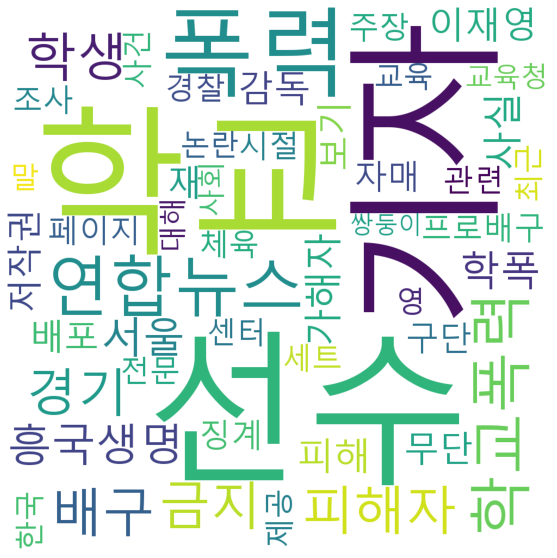

In [9]:
cloud = wc.generate_from_frequencies(dict(noun_list))
#cloud.to_file('test.jpg')
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()